### 1. Reading Dataset

In [1]:
#List of packages that is used in EDA and preprocessing.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
#Reading the dataset
data = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")
data

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

### 2. Data Preprocessing
Converting the data into usable format.

    a. Hot encoding categorical columns.
    b. Marking Window 0-2 as 1 if the patient was admitted to ICU in any of the future windows.
    c. Removing all the records of the windows in which patients were actually admitted to the ICU in Window 0-2.
    d. Keep only first row of the patient and fill the NaN values of window 0-2 with the mean values of all windows.
    e. Removing unnecessary columns.
    f. Removing all the rows still having NaN values.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB
None


###### a. Hot encoding categorical columns.

In [4]:
no_ICU_column = data.drop('ICU', axis = 1)     #seperating the target ("ICU") column
ICU_column = data['ICU']

hotcode_columns = data.select_dtypes(object).columns     #finding columns that are not of float or integer
hotcode_columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [5]:
no_ICU_column = pd.get_dummies(no_ICU_column, columns = hotcode_columns)     #performing hotcoding
no_ICU_column.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
data_extend = pd.concat([no_ICU_column, ICU_column], axis = 1)         #adding the ICU column again at the last position
data_extend.head(5)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,ICU
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

###### b. Marking Window 0-2 as 1 if the patient was admitted to ICU in any of the future windows.

In [7]:
column_names = data_extend.columns
lst = data_extend.to_numpy()
print(lst)

[[  0.   1.   0. ...   0.   0.   0.]
 [  0.   1.   0. ...   0.   0.   0.]
 [  0.   1.   0. ...   0.   0.   0.]
 ...
 [384.   0.   1. ...   0.   0.   0.]
 [384.   0.   1. ...   1.   0.   0.]
 [384.   0.   1. ...   0.   1.   0.]]


In [8]:
# create loop to record the rows in which patient is admitted to the ICU and adding 1 label to the previous rows.
i=0
ICU_admitted_rows = []
while(i<len(lst)):
    for j in range(5):
        if(lst[i+j][-1]==1):
            for k in range(j):
                lst[i+k][-1]=1
            for toremove in range(i+j,i+5):
                ICU_admitted_rows.append(toremove)
            break
    i+=5
print(ICU_admitted_rows)

[4, 5, 6, 7, 8, 9, 14, 58, 59, 69, 72, 73, 74, 79, 85, 86, 87, 88, 89, 92, 93, 94, 99, 122, 123, 124, 135, 136, 137, 138, 139, 141, 142, 143, 144, 147, 148, 149, 157, 158, 159, 183, 184, 187, 188, 189, 192, 193, 194, 197, 198, 199, 202, 203, 204, 205, 206, 207, 208, 209, 222, 223, 224, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 261, 262, 263, 264, 268, 269, 270, 271, 272, 273, 274, 278, 279, 310, 311, 312, 313, 314, 317, 318, 319, 321, 322, 323, 324, 338, 339, 343, 344, 349, 354, 367, 368, 369, 387, 388, 389, 394, 397, 398, 399, 408, 409, 411, 412, 413, 414, 424, 425, 426, 427, 428, 429, 432, 433, 434, 436, 437, 438, 439, 443, 444, 448, 449, 450, 451, 452, 453, 454, 474, 484, 498, 499, 501, 502, 503, 504, 512, 513, 514, 516, 517, 518, 519, 520, 521, 522, 523, 524, 527, 528, 529, 530, 531, 532, 533, 534, 539, 545, 546, 547, 548, 549, 559, 569, 582, 583, 584, 585, 586, 587, 588, 589, 596, 597, 598, 599, 603, 604, 624, 627, 628, 629, 663, 664, 668, 669, 684, 689, 694, 696, 697, 698

###### c. Removing all the records of the windows in which patients were actually admitted to the ICU in Window 0-2.

In [9]:
#removing the rows in which patient was admitted to the ICU
deletedcount = 0
for rowToRemove in ICU_admitted_rows:             
    lst = np.delete(lst, rowToRemove-deletedcount, axis=0)
    deletedcount+=1
df = pd.DataFrame(lst, columns = column_names)
df.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,ICU
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

###### d. Keep only first row of the patient and fill the NaN values of window 0-2 with the help of mean of values in all the windows of that patient.

In [10]:
#keeping only the first window that is 0-2 for every patient and filling NaN values with mean of all windows.
pd.options.mode.chained_assignment = None 
edited_dfs_list = []
max_patient_id = df['PATIENT_VISIT_IDENTIFIER'].max()
for i in range(int(max_patient_id)):                
    tempdf = df[df['PATIENT_VISIT_IDENTIFIER']==i]
    if(len(tempdf)!=0):
        tempdf.fillna(tempdf.mean(), inplace=True)
        tempdf = tempdf.iloc[[0]]
        edited_dfs_list.append(tempdf)

final_data = pd.concat(edited_dfs_list)
final_data.head(10)

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,WINDOW_0-2,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,ICU
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.3170

###### e. Removing unnecessary columns.

In [11]:
# Drop unnecessary columns.
final_data = final_data.drop(['GENDER','PATIENT_VISIT_IDENTIFIER','WINDOW_0-2',	'WINDOW_2-4',
                              'WINDOW_4-6','WINDOW_6-12','WINDOW_ABOVE_12'],axis = 1)
final_data.head()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,0.605263,0.605263,0.605263,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.317073,-0.317073,-0.317073,-0.317073,-1.0,-0.938950,-0.938950,-0.938950,-0.93895

###### f. Removing all the rows still having NaN values.

In [12]:
# Drop remaining rows with NAN values as there is no data in any window.
final_data = final_data.dropna(axis = 0)
final_data.isnull().sum()

AGE_ABOVE65                 0
DISEASE GROUPING 1          0
DISEASE GROUPING 2          0
DISEASE GROUPING 3          0
DISEASE GROUPING 4          0
                           ..
AGE_PERCENTIL_70th          0
AGE_PERCENTIL_80th          0
AGE_PERCENTIL_90th          0
AGE_PERCENTIL_Above 90th    0
ICU                         0
Length: 237, dtype: int64

In [13]:
final_data.describe()

,AGE_ABOVE65,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th,ICU
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.000000,293.000000,293.0,293.000000,293.000000,293.000000,293.000000,2

### 3. Data Visualization

###### a. Distribution analysis

Total number of patient:  293
Distribution of ICU admissions
Patients who were not admitted to ICU:  188
Patients who were admitted to ICU:  105


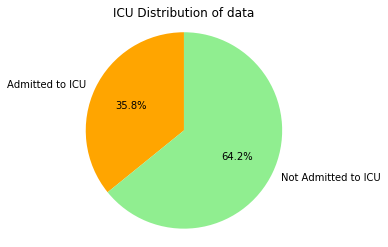

In [14]:
# Distribution of ICU and non-ICU patients.

ICU_admission = final_data['ICU'].value_counts()

print("Total number of patient: ", sum(ICU_admission))
print("Distribution of ICU admissions")
print("Patients who were not admitted to ICU: ",ICU_admission[0])
print("Patients who were admitted to ICU: ",ICU_admission[1])

labels= ['Admitted to ICU', 'Not Admitted to ICU']
colors=['orange', 'lightgreen']
sizes= [ICU_admission[1], ICU_admission[0]]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.title("ICU Distribution of data")
plt.axis('equal')
plt.show()

Age Distribution
Patients below age 65:  172
Patients above age 65:  121


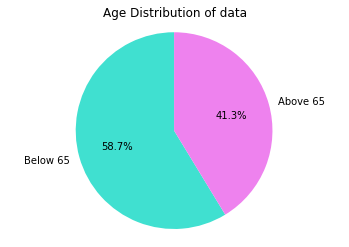

In [15]:
# Distribution of patient age.

Age_distr = final_data['AGE_ABOVE65'].value_counts()
print("Age Distribution")
print("Patients below age 65: ",Age_distr[0])
print("Patients above age 65: ",Age_distr[1])
labels= ['Below 65', 'Above 65']
colors=['turquoise', 'violet']
sizes= [Age_distr[0], Age_distr[1]]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Age Distribution of data")
plt.show()

Age Distribution
Patients below age 65:  45
Patients above age 65:  60


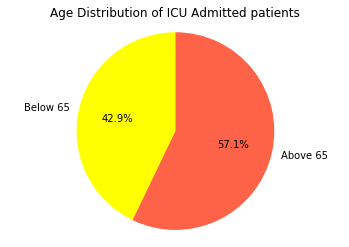

In [16]:
# Distribution of ICU admitted patients by age.

ICU_Admitted_data = final_data[final_data['ICU']==1]
Age_distr = ICU_Admitted_data['AGE_ABOVE65'].value_counts()
print("Age Distribution")
print("Patients below age 65: ",Age_distr[0])
print("Patients above age 65: ",Age_distr[1])
labels= ['Below 65', 'Above 65']
colors=['yellow', 'tomato']
sizes= [Age_distr[0], Age_distr[1]]
plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Age Distribution of ICU Admitted patients")
plt.show()

###### b. Correlation analysis

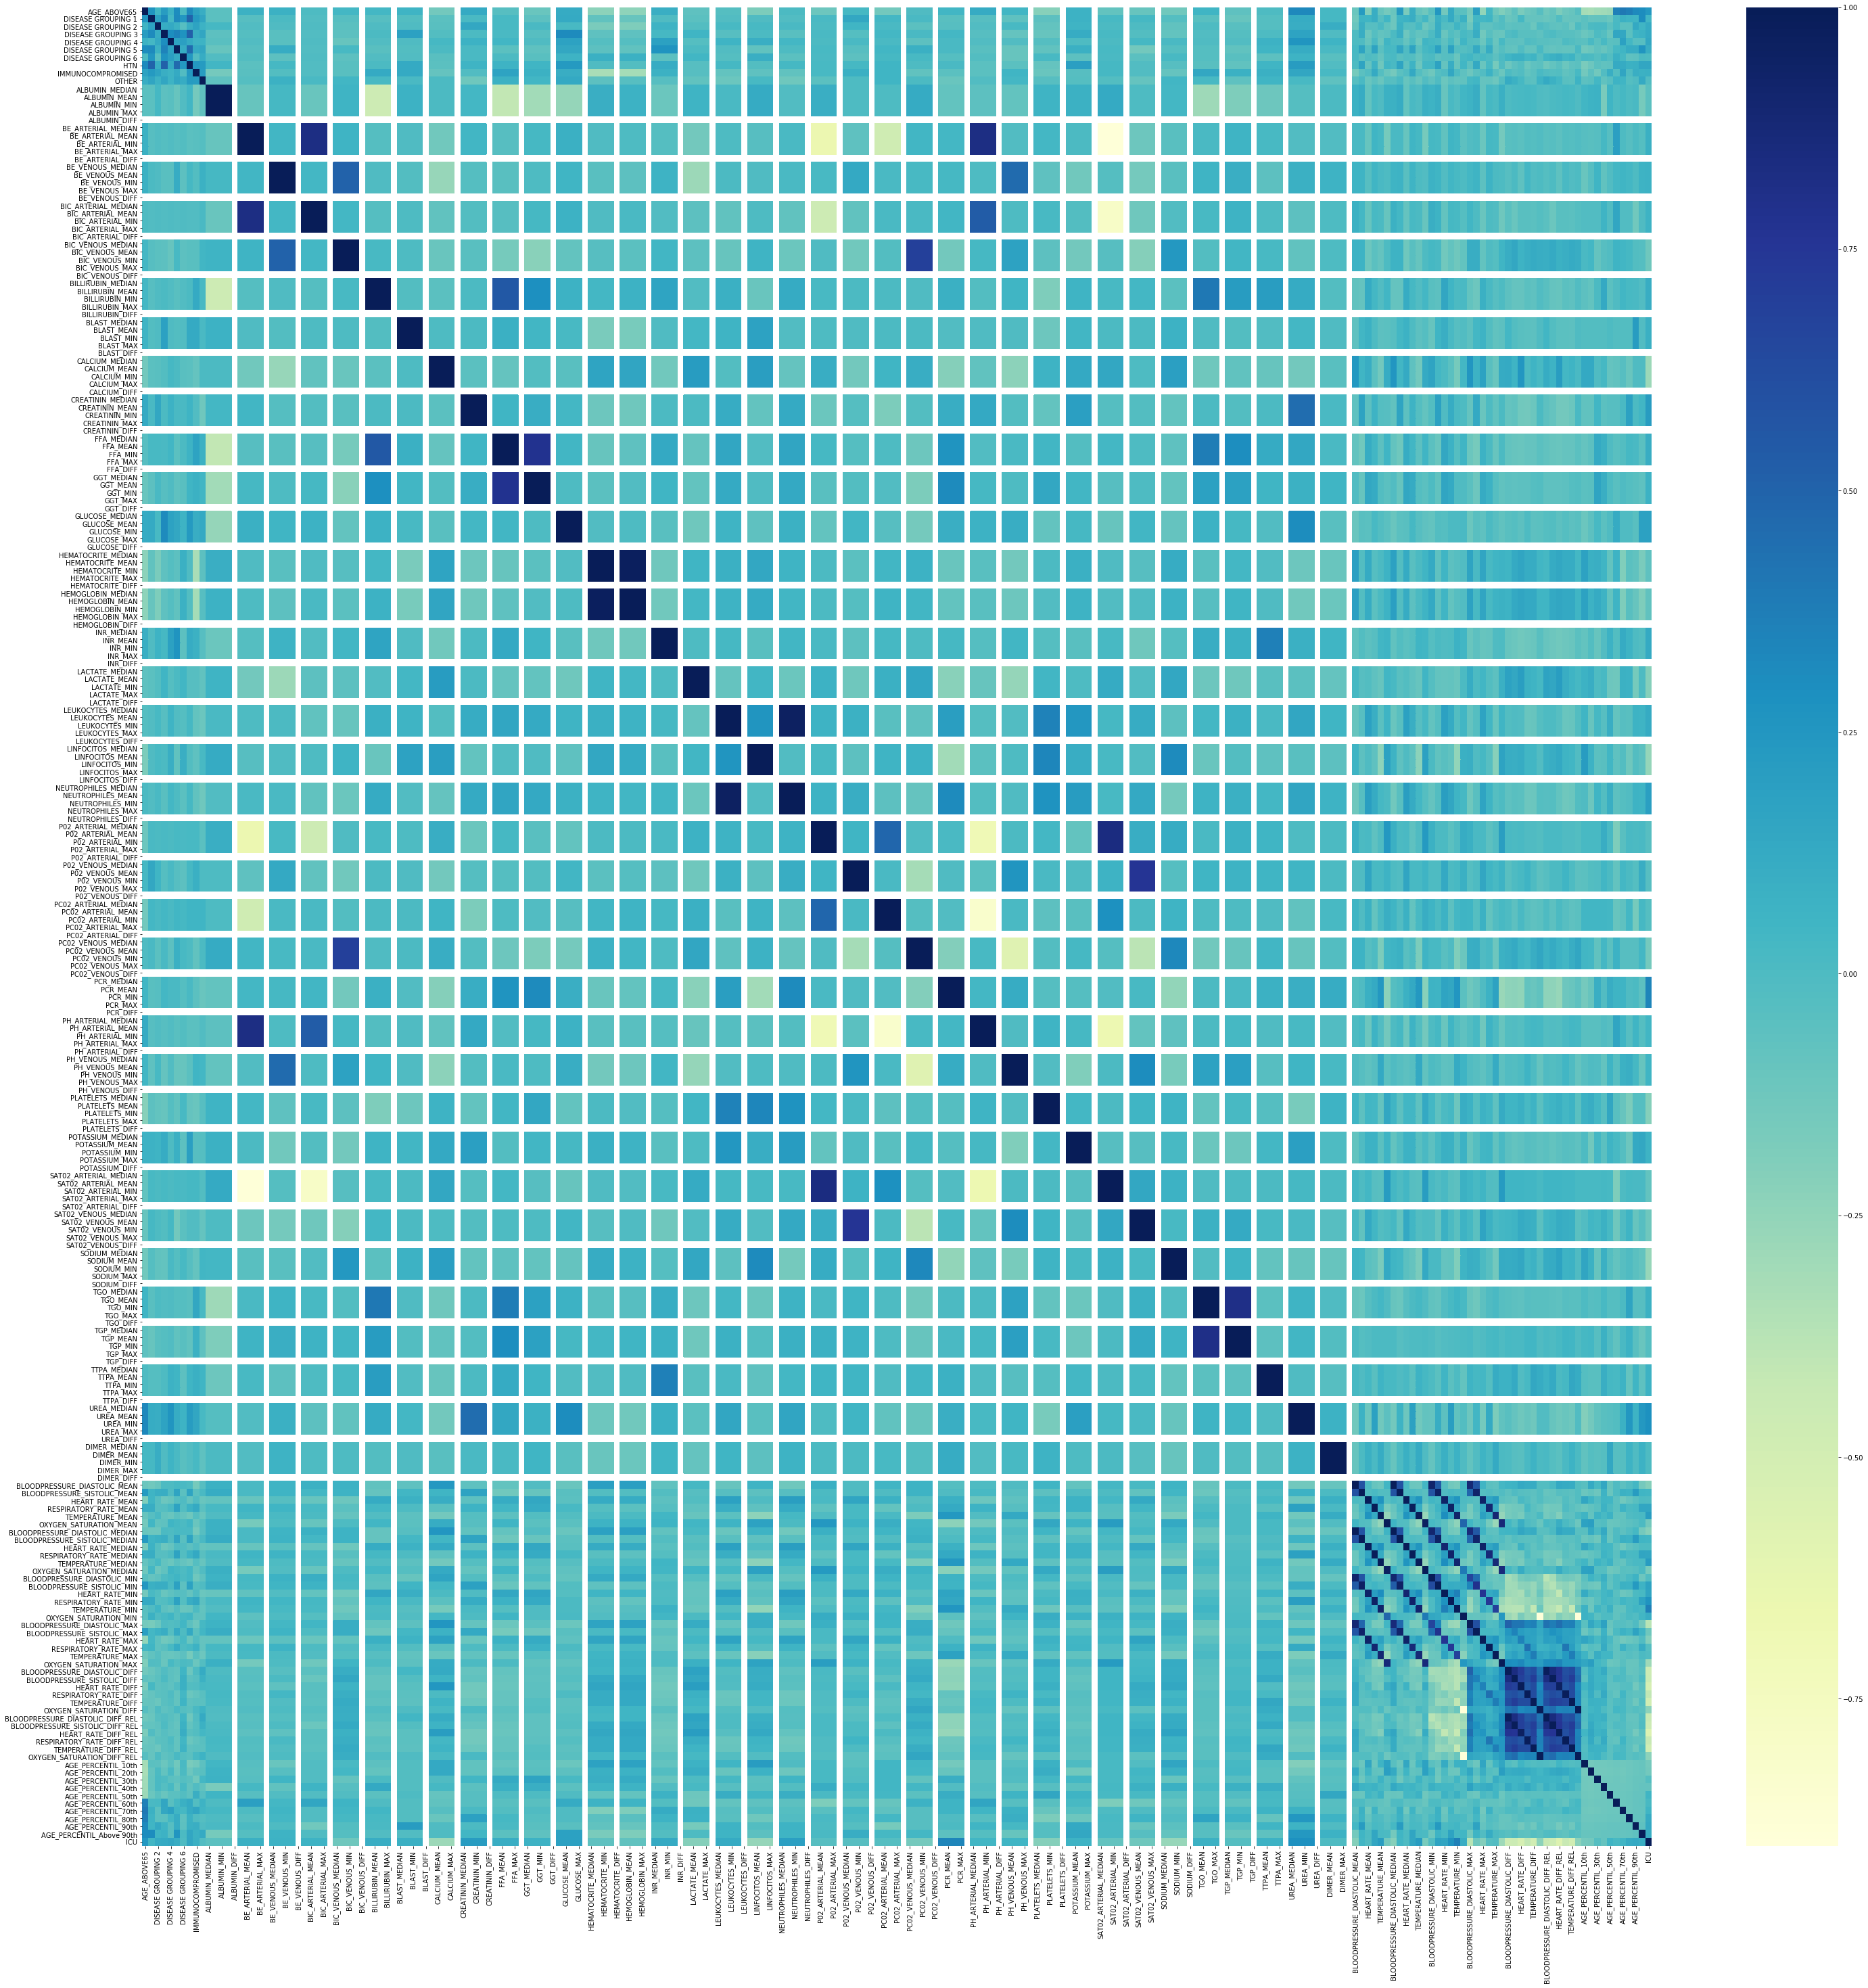

In [17]:
import seaborn as sns
corr = final_data.corr()
plt.subplots(figsize=(50,50))
sns.heatmap(corr, cmap="YlGnBu")

As we can see, it impossible to see the correlation between each variable through the heatmap as there were many variables. Thus, we will focus on those feature that have high correlation with our target variable ("ICU").

In [18]:
# ICU correlation information
corr.shape
ICU_corr = corr.iloc[236]
ICU_corr.describe()

count    201.000000
mean      -0.007311
std        0.195205
min       -0.561299
25%       -0.126787
50%        0.044200
75%        0.103800
max        1.000000
Name: ICU, dtype: float64

In [19]:
#Choosing features with high correlation with ICU.
ICU_corr = np.array(ICU_corr)
selected = []
for i in ICU_corr:
    if(i):
        if(i>0.11):
            selected.append(True)
        elif(i<-0.12):
            selected.append(True)
        else:
            selected.append(False)
    else:
        selected.append(False)

print(len(selected), selected.count(True))
selected = np.array(selected)
selected_final_data = final_data.loc[:, selected]
selected_final_data.head()

237 98


,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ICU
0,1.0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,0.183673,0.183673,0.183673,0.183673,-0.868365,-0.868365,-0.868365,-0.868365,-0.891993,-0.891993,-0.891993,-0.891993,-0.932246,-0.932246,-0.932246,-0.932246,1.000000,1.000000,1.000000,1.000000,-0.835844,-0.835844,-0.835844,-0.835844,-0.914938,-0.914938,-0.914938,-0.914938,-0.868747,-0.868747,-0.868747,-0.868747,-0.754601,-0.754601,-0.754601,-0.754601,-0.875236,-0.875236,-0.875236,-0.875236,-0.540721,-0.540721,-0.540721,-0.540721,0.345679,0.345679,0.345679,0.345679,-0.028571,-0.028571,-0.028571,-0.028571,-0.836145,-0.836145,-0.836145,-0.836145,0.086420,-0.593220,-0.285714,0.736842,0.086420,-0.586207,-0.285714,0.736842,0.000000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,0.357143,0.357143,0.357143,0.357143,-0.912243,-0.912243,-0.912243,-0.912243,-0.780261,-0.780261,-0.780261,-0.780261,-0.959849,-0.959849,-0.959849,-0.959849,1.000000,1.000000,1.000000,1.000000,-0.382773,-0.382773,-0.382773,-0.382773,-0.908714,-0.908714,-0.908714,-0.908714,-0.412965,-0.412965,-0.412965,-0.412965,-0.754601,-0.754601,-0.754601,-0.754601,-0.939887,-0.939887,-0.939887,-0.939887,-0.399199,-0.399199,-0.399199,-0.399199,0.345679,0.345679,0.345679,0.345679,0.085714,0.085714,0.085714,0.085714,-0.836145,-0.836145,-0.836145,-0.836145,-0.551183,-0.683145,0.357143,0.867507,-0.555556,-0.620690,0.357143,0.881579,-0.587500,-0.145299,-0.678571,0.604396,-0.504274,-0.627027,0.000000,1.000000,-0.626087,-0.613497,-0.572519,-0.852941,-1.000000,-0.878788,-0.587195,-0.457543,-0.734417,-0.841577,-1.000000,-0.881277,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,-0.317073,-0.317073,-0.317073,-0.317073,0.326531,0.326531,0.326531,0.326531,-0.968861,-0.968861,-0.968861,-0.968861,-0.891993,-0.891993,-0.891993,-0.891993,-0.959849,-0.959849,-0.959849,-0.959849,-0.828421,-0.828421,-0.828421,-0.828421,-0.729239,-0.729239,-0.729239,-0.729239,-0.836100,-0.836100,-0.836100,-0.836100,-0.784714,-0.784714,-0.784714,-0.784714,-0.779141,-0.779141,-0.779141,-0.779141,-0.503592,-0.503592,-0.503592,-0.503592,-0.564753,-0.564753,-0.564753,-0.564753,0.580247,0.580247,0.580247,0.580247,0.200000,0.2000

In [20]:
# Removing all median and relative difference columns

selected_final_data = selected_final_data[['AGE_ABOVE65', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4',
                                           'HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN' , 'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN',
                                           'LACTATE_MEAN', 'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN', 'PC02_VENOUS_MEAN',
                                           'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN', 'SODIUM_MEAN', 'UREA_MEAN', 'BLOODPRESSURE_DIASTOLIC_MEAN',
                                           'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN', 'BLOODPRESSURE_SISTOLIC_MIN',
                                           'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN', 'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX', 'BLOODPRESSURE_SISTOLIC_MAX',
                                           'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX', 'BLOODPRESSURE_DIASTOLIC_DIFF', 'BLOODPRESSURE_SISTOLIC_DIFF', 
                                           'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF', 
                                           'AGE_PERCENTIL_10th', 'AGE_PERCENTIL_20th', 'AGE_PERCENTIL_80th', 'AGE_PERCENTIL_90th', 'ICU']]

selected_final_data.head()

,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEAN,CALCIUM_MEAN,CREATININ_MEAN,GLUCOSE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PLATELETS_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,UREA_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ICU
0,1.0,0.0,0.0,0.0,0.0,-0.317073,0.183673,-0.868365,-0.891993,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.754601,-0.875236,-0.540721,0.345679,-0.028571,-0.836145,0.086420,-0.593220,-0.285714,0.736842,0.000000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.912243,-0.780261,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.754601,-0.939887,-0.399199,0.345679,0.085714,-0.836145,-0.551183,-0.683145,0.357143,0.867507,-0.587500,-0.145299,-0.678571,0.604396,-0.504274,-0.627027,0.000000,1.000000,-0.626087,-0.613497,-0.572519,-0.852941,-1.000000,-0.878788,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,-0.317073,0.326531,-0.968861,-0.891993,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.779141,-0.503592,-0.564753,0.580247,0.200000,-0.937349,-0.132620,-0.506215,-0.119762,0.652398,-0.329167,-0.435897,-0.547619,0.216117,-0.247863,-0.506306,-0.263682,0.754386,-0.692754,-0.730061,-0.582697,-0.784314,-0.682540,-0.723906,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.913659,-0.851024,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.754601,-0.990926,-0.457944,0.345679,0.142857,-0.903614,0.236838,-0.539451,0.189142,0.852390,0.000000,0.048433,-0.500000,0.362637,-0.076923,-0.293694,0.019900,0.912281,-0.826087,-0.811861,-0.725191,-0.901961,-0.761905,-0.959596,1.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.891012,-0.891993,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.754601,-0.997732,-0.292390,0.345679,0.085714,-0.884337,-0.078189,-0.495292,-0.137566,0.835283,-0.291667,-0.418803,-0.404762,0.252747,-0.282051,-0.553153,-0.482587,0.894737,-0.843478,-0.820041,-0.821883,-0.980392,-0.904762,-0.966330,1.0,0.0,0.0,0.0,0.0


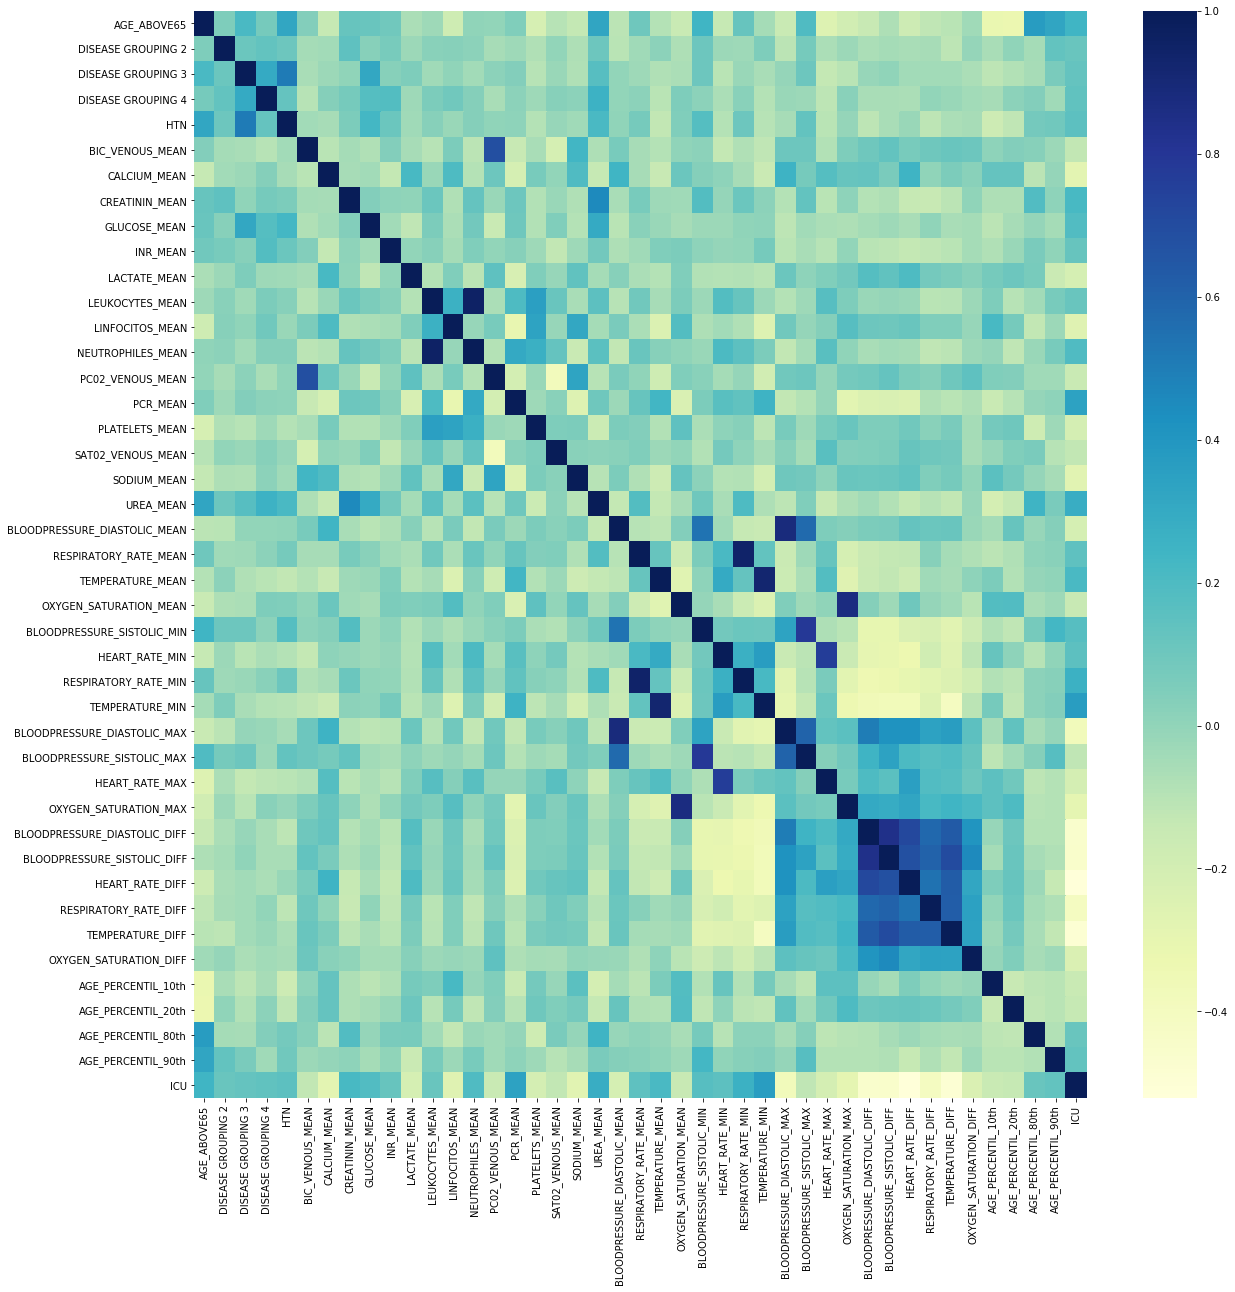

In [21]:
corr = selected_final_data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr, cmap="YlGnBu")

###### c. Comparing the vital signs and lab test results of ICU & non-ICU patients.

In [22]:
Non_ICU_Admitted_data = selected_final_data[selected_final_data['ICU']==0]
ICU_Admitted_data = selected_final_data[selected_final_data['ICU']==1]

In [23]:
Vital_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']]

Vital_ICU_Admitted_data = ICU_Admitted_data[['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF']]

Lab_Non_ICU_Admitted_data = Non_ICU_Admitted_data[['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']]

Lab_ICU_Admitted_data = ICU_Admitted_data[['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN']]

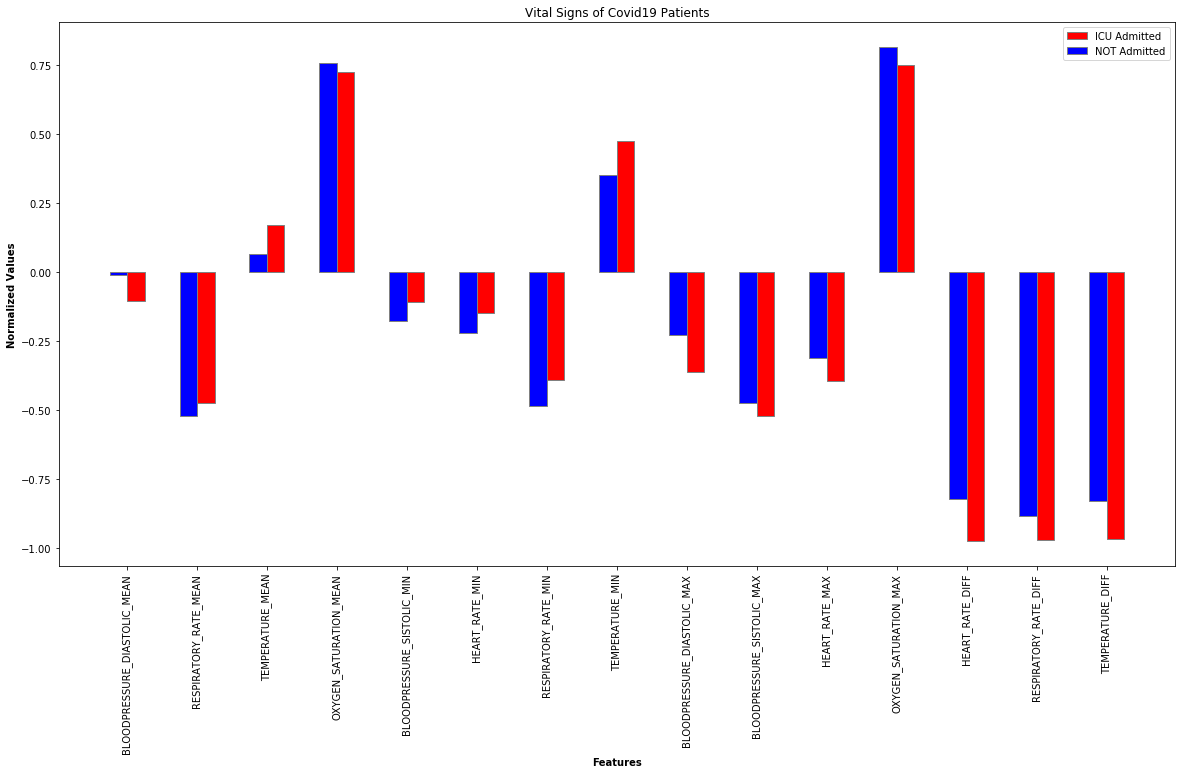

In [24]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10)) 
   
vital_non_ICU = np.array(Vital_Non_ICU_Admitted_data.mean(axis=0)) 
vital_ICU = np.array(Vital_ICU_Admitted_data.mean(axis=0)) 
   
# Set position of bar on X axis 
br1 = np.arange(len(vital_ICU)) + (barWidth*0.5)
br2 = [x + barWidth for x in br1]  
   
# Make the plot 
plt.bar(br2, vital_ICU, color ='r', width = barWidth, edgecolor ='grey', label ='ICU Admitted') 
plt.bar(br1, vital_non_ICU, color ='b', width = barWidth, edgecolor ='grey', label ='NOT Admitted') 

   
plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Normalized Values', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(vital_ICU))], ['BLOODPRESSURE_DIASTOLIC_MEAN',
       'RESPIRATORY_RATE_MEAN', 'TEMPERATURE_MEAN', 'OXYGEN_SATURATION_MEAN',
       'BLOODPRESSURE_SISTOLIC_MIN', 'HEART_RATE_MIN', 'RESPIRATORY_RATE_MIN',
       'TEMPERATURE_MIN', 'BLOODPRESSURE_DIASTOLIC_MAX',
       'BLOODPRESSURE_SISTOLIC_MAX', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'HEART_RATE_DIFF', 'RESPIRATORY_RATE_DIFF', 'TEMPERATURE_DIFF'], rotation = 90) 

plt.legend()
plt.title("Vital Signs of Covid19 Patients")
plt.show()

From the bar chart above, we can see that most of the vital signs are different between the ICU admitted patients and non-ICU patients. These differences can help in better classifying the patient's condition whether he/she is needed to be admitted to ICU. Since all variable showed difference reading for ICU and non-ICU, so no variable will be removed.

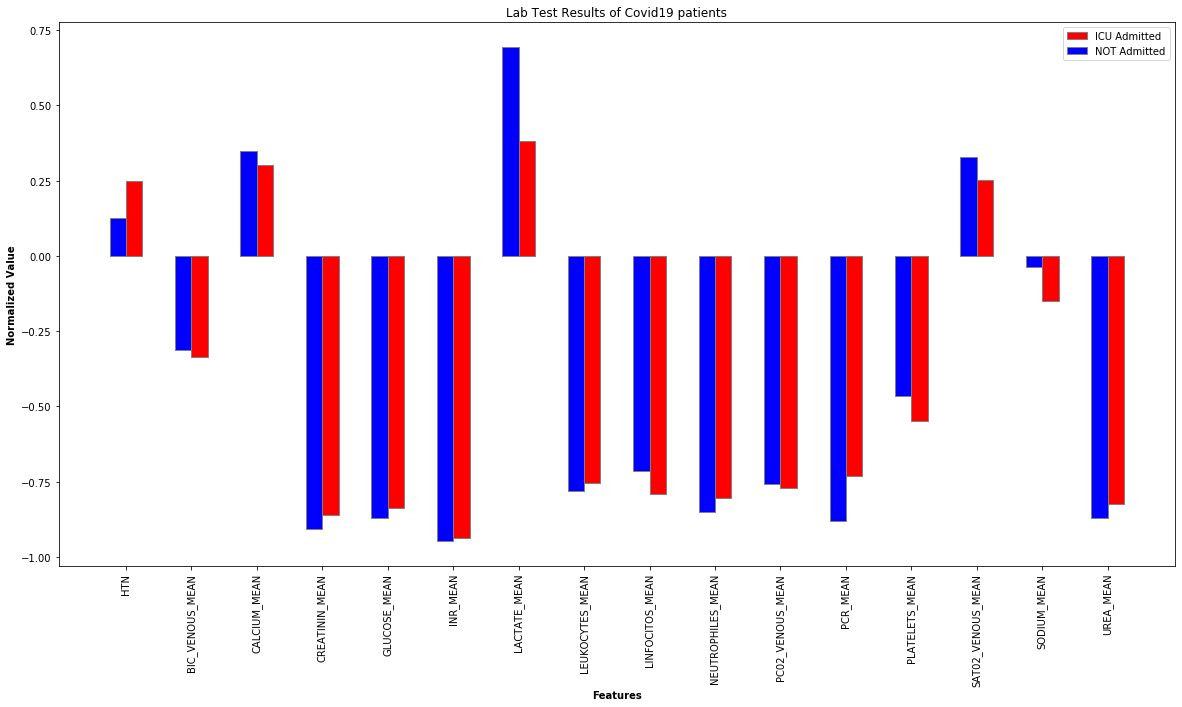

In [25]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(20, 10)) 
   
lab_non_ICU = np.array(Lab_Non_ICU_Admitted_data.mean(axis=0)) 
lab_ICU = np.array(Lab_ICU_Admitted_data.mean(axis=0)) 
   
# Set position of bar on X axis 
br1 = np.arange(len(lab_ICU)) + (barWidth*0.5)
br2 = [x + barWidth for x in br1]  
   
# Make the plot 
plt.bar(br2, lab_ICU, color ='r', width = barWidth, edgecolor ='grey', label ='ICU Admitted') 
plt.bar(br1, lab_non_ICU, color ='b', width = barWidth, edgecolor ='grey', label ='NOT Admitted') 

   
plt.xlabel('Features', fontweight ='bold') 
plt.ylabel('Normalized Value', fontweight ='bold') 
plt.legend()
plt.xticks([r + barWidth for r in range(len(lab_ICU))], ['HTN', 'BIC_VENOUS_MEAN', 'CALCIUM_MEAN',
       'CREATININ_MEAN', 'GLUCOSE_MEAN', 'INR_MEAN', 'LACTATE_MEAN',
       'LEUKOCYTES_MEAN', 'LINFOCITOS_MEAN', 'NEUTROPHILES_MEAN',
       'PC02_VENOUS_MEAN', 'PCR_MEAN', 'PLATELETS_MEAN', 'SAT02_VENOUS_MEAN',
       'SODIUM_MEAN', 'UREA_MEAN'], rotation = 90) 
plt.title("Lab Test Results of Covid19 patients")
plt.show()

Similarly for the blood test result, all the variable has different reading between ICU and non-ICU patients. So, none of the variable will be removed.

###### d. Dimentionality reduction

In [26]:
#Create features set and target set
X_data = selected_final_data.drop(['ICU'], axis = 1)
Y_data = selected_final_data.ICU
print(X_data.shape)
print(Y_data.shape)

(293, 42)
(293,)


C:\Users\user\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


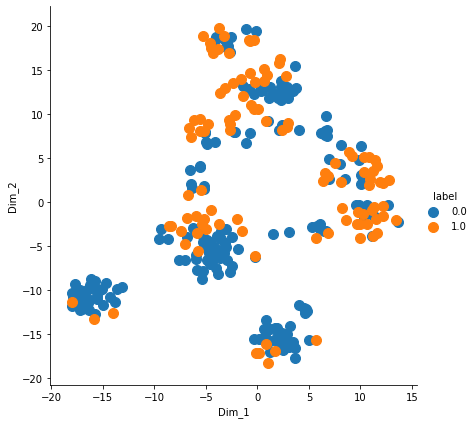

In [27]:
#Plotting t-SNE for dimentionality reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE 

model = TSNE(n_components = 2, random_state = 0) 
  
tsne_data = model.fit_transform(X_data) 

tsne_data = np.vstack((tsne_data.T, Y_data)).T 
tsne_df = pd.DataFrame(data = tsne_data, 
     columns =("Dim_1", "Dim_2","label"))

# Ploting the result of tsne 
sns.FacetGrid(tsne_df, hue ="label", size = 6).map( 
       plt.scatter, 'Dim_1', 'Dim_2', s = 100).add_legend() 
  
plt.show() 

### 4. Modelling

Machine learning algorithms chose:

    a. Gaussian Naive Bayes
    b. Logistic Regression 
    c. Support Vector Machine
    d. Random Forest

In [28]:
# Load evaluation libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn_evaluation import plot
import matplotlib.pyplot as eval_chart

In [29]:
selected_final_data.head()

,AGE_ABOVE65,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,HTN,BIC_VENOUS_MEAN,CALCIUM_MEAN,CREATININ_MEAN,GLUCOSE_MEAN,INR_MEAN,LACTATE_MEAN,LEUKOCYTES_MEAN,LINFOCITOS_MEAN,NEUTROPHILES_MEAN,PC02_VENOUS_MEAN,PCR_MEAN,PLATELETS_MEAN,SAT02_VENOUS_MEAN,SODIUM_MEAN,UREA_MEAN,BLOODPRESSURE_DIASTOLIC_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,AGE_PERCENTIL_10th,AGE_PERCENTIL_20th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,ICU
0,1.0,0.0,0.0,0.0,0.0,-0.317073,0.183673,-0.868365,-0.891993,-0.932246,1.000000,-0.835844,-0.914938,-0.868747,-0.754601,-0.875236,-0.540721,0.345679,-0.028571,-0.836145,0.086420,-0.593220,-0.285714,0.736842,0.000000,-0.162393,-0.500000,0.208791,-0.247863,-0.459459,-0.432836,0.736842,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.912243,-0.780261,-0.959849,1.000000,-0.382773,-0.908714,-0.412965,-0.754601,-0.939887,-0.399199,0.345679,0.085714,-0.836145,-0.551183,-0.683145,0.357143,0.867507,-0.587500,-0.145299,-0.678571,0.604396,-0.504274,-0.627027,0.000000,1.000000,-0.626087,-0.613497,-0.572519,-0.852941,-1.000000,-0.878788,1.0,0.0,0.0,0.0,1.0
8,0.0,0.0,0.0,0.0,0.0,-0.317073,0.326531,-0.968861,-0.891993,-0.959849,-0.828421,-0.729239,-0.836100,-0.784714,-0.779141,-0.503592,-0.564753,0.580247,0.200000,-0.937349,-0.132620,-0.506215,-0.119762,0.652398,-0.329167,-0.435897,-0.547619,0.216117,-0.247863,-0.506306,-0.263682,0.754386,-0.692754,-0.730061,-0.582697,-0.784314,-0.682540,-0.723906,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.913659,-0.851024,-0.959849,1.000000,-0.702202,-0.641079,-0.812725,-0.754601,-0.990926,-0.457944,0.345679,0.142857,-0.903614,0.236838,-0.539451,0.189142,0.852390,0.000000,0.048433,-0.500000,0.362637,-0.076923,-0.293694,0.019900,0.912281,-0.826087,-0.811861,-0.725191,-0.901961,-0.761905,-0.959596,1.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,-0.317073,0.357143,-0.891012,-0.891993,-0.959849,1.000000,-0.706450,-0.340249,-0.846339,-0.754601,-0.997732,-0.292390,0.345679,0.085714,-0.884337,-0.078189,-0.495292,-0.137566,0.835283,-0.291667,-0.418803,-0.404762,0.252747,-0.282051,-0.553153,-0.482587,0.894737,-0.843478,-0.820041,-0.821883,-0.980392,-0.904762,-0.966330,1.0,0.0,0.0,0.0,0.0


In [30]:
selected_final_data.ICU.value_counts()

0.0    188
1.0    105
Name: ICU, dtype: int64

Since the data is unbalanced, we will focus on the F1-score for model performance.

In [31]:
# Split data to train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y_data, test_size=0.20, random_state=1)

###### a. Gaussian Naive Bayes

In [32]:
from sklearn.naive_bayes import GaussianNB

gnb=GaussianNB()
gnb.fit(X_train,Y_train)
y_pred=gnb.predict(X_test)

Accuracy: 0.847457627118644
F1 score: 0.7692307692307692
Recall: 0.75
Precision: 0.7894736842105263
ROC: 0.8237179487179487


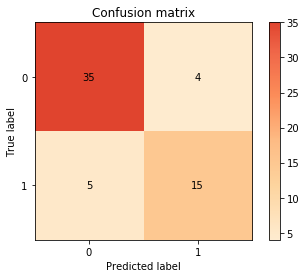

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        39
           1       0.79      0.75      0.77        20

    accuracy                           0.85        59
   macro avg       0.83      0.82      0.83        59
weighted avg       0.85      0.85      0.85        59



In [33]:
print ('Accuracy:', accuracy_score(Y_test,y_pred))
print ('F1 score:', f1_score(Y_test,y_pred, pos_label=1))
print ('Recall:', recall_score(Y_test,y_pred, pos_label=1))
print ('Precision:', precision_score(Y_test,y_pred, pos_label=1))
print ('ROC:', roc_auc_score(Y_test,y_pred))

plot.confusion_matrix(Y_test,y_pred,target_names=[0,1])
eval_chart.show()

print(classification_report(Y_test,y_pred, labels = [0,1]))

###### b. Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

lgc=LogisticRegression(random_state=0)
lgc.fit(X_train, Y_train)
y_pred1=lgc.predict(X_test)

Accuracy: 0.8813559322033898
F1 score: 0.8108108108108107
Recall: 0.75
Precision: 0.8823529411764706
ROC: 0.8493589743589743


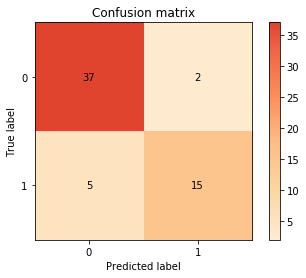

              precision    recall  f1-score   support

           0       0.88      0.95      0.91        39
           1       0.88      0.75      0.81        20

    accuracy                           0.88        59
   macro avg       0.88      0.85      0.86        59
weighted avg       0.88      0.88      0.88        59



In [35]:
print ('Accuracy:', accuracy_score(Y_test,y_pred1))
print ('F1 score:', f1_score(Y_test,y_pred1, pos_label=1))
print ('Recall:', recall_score(Y_test,y_pred1, pos_label=1))
print ('Precision:', precision_score(Y_test,y_pred1, pos_label=1))
print ('ROC:', roc_auc_score(Y_test,y_pred1))

plot.confusion_matrix(Y_test,y_pred1,target_names=[0,1])
eval_chart.show()

print(classification_report(Y_test,y_pred1, labels = [0,1]))

###### c. Support Vector Machine (SVM)

In [36]:
from sklearn import svm

svmc = svm.SVC(kernel='linear')
svmc.fit(X_train,Y_train)
y_pred2=svmc.predict(X_test)

Accuracy: 0.8983050847457628
F1 score: 0.8333333333333334
Recall: 0.75
Precision: 0.9375
ROC: 0.8621794871794871


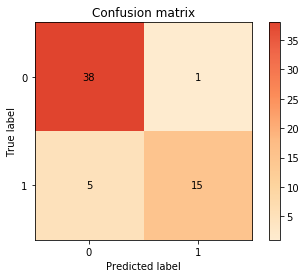

              precision    recall  f1-score   support

           0       0.88      0.97      0.93        39
           1       0.94      0.75      0.83        20

    accuracy                           0.90        59
   macro avg       0.91      0.86      0.88        59
weighted avg       0.90      0.90      0.90        59



In [37]:
print ('Accuracy:', accuracy_score(Y_test,y_pred2))
print ('F1 score:', f1_score(Y_test,y_pred2, pos_label=1))
print ('Recall:', recall_score(Y_test,y_pred2, pos_label=1))
print ('Precision:', precision_score(Y_test,y_pred2, pos_label=1))
print ('ROC:', roc_auc_score(Y_test,y_pred2))

plot.confusion_matrix(Y_test,y_pred2,target_names=[0,1])
eval_chart.show()

print(classification_report(Y_test,y_pred2, labels = [0,1]))

###### d. Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='gini',random_state=23,max_depth=6,bootstrap=True)
rfc.fit(X_train,Y_train)
y_pred3=rfc.predict(X_test)

Accuracy: 0.9491525423728814
F1 score: 0.9268292682926829
Recall: 0.95
Precision: 0.9047619047619048
ROC: 0.9493589743589743


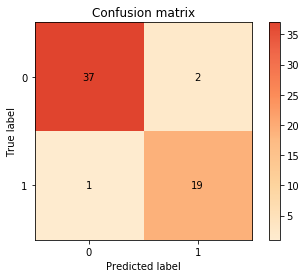

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        39
           1       0.90      0.95      0.93        20

    accuracy                           0.95        59
   macro avg       0.94      0.95      0.94        59
weighted avg       0.95      0.95      0.95        59



In [40]:
print ('Accuracy:', accuracy_score(Y_test,y_pred3))
print ('F1 score:', f1_score(Y_test,y_pred3, pos_label=1))
print ('Recall:', recall_score(Y_test,y_pred3, pos_label=1))
print ('Precision:', precision_score(Y_test,y_pred3, pos_label=1))
print ('ROC:', roc_auc_score(Y_test,y_pred3))

plot.confusion_matrix(Y_test,y_pred3,target_names=[0,1])
eval_chart.show()

print(classification_report(Y_test,y_pred3, labels = [0,1]))

In [41]:
# Features Importance
# grab feature importances from the model and feature name 
importances = rfc.feature_importances_
feature_names = X_data.columns

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

for i in indices:
    print(feature_names[i], ':', importances[i])

HEART_RATE_DIFF : 0.09143160722166951
TEMPERATURE_DIFF : 0.0750008213854117
BLOODPRESSURE_SISTOLIC_DIFF : 0.06531654098755023
BLOODPRESSURE_DIASTOLIC_DIFF : 0.06461548698360498
RESPIRATORY_RATE_DIFF : 0.05943031374592147
LINFOCITOS_MEAN : 0.05009689018150298
SODIUM_MEAN : 0.04117948621308863
OXYGEN_SATURATION_DIFF : 0.03852755096879207
PCR_MEAN : 0.0382461973003971
PLATELETS_MEAN : 0.03230509129266812
RESPIRATORY_RATE_MEAN : 0.027900332172488603
RESPIRATORY_RATE_MIN : 0.02734535991361132
CALCIUM_MEAN : 0.026926053469002474
TEMPERATURE_MIN : 0.026381346907662903
UREA_MEAN : 0.02603908879997855
NEUTROPHILES_MEAN : 0.02469423604567854
LEUKOCYTES_MEAN : 0.02255165385802793
BLOODPRESSURE_DIASTOLIC_MAX : 0.02180339758968662
BLOODPRESSURE_DIASTOLIC_MEAN : 0.021057235796924315
HEART_RATE_MIN : 0.018724880275918853


In [44]:
estimator = rfc.estimators_[5]

In [45]:
# Visualizing Decision Tree from Random Forest classifier
import pydot
from io import StringIO
from sklearn.tree import export_graphviz
    
dotfile = StringIO()
export_graphviz(estimator, out_file=dotfile, feature_names=feature_names)
graph = pydot.graph_from_dot_data(dotfile.getvalue())
graph[0].write_png("dtree.png")

<img src="dtree.png">

Classifiers Performance Comparison:

<table class="table table-bordered">
    <thead>
        <tr>
            <th>Classifier</th>
            <th>Precision</th>
            <th>F1 Score</th>
            <th>Recall</th>
            <th>Accuracy</th>
            <th>ROC Curve</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Gaussian Naive Bayes</td>
            <td>0.789</td>
            <td>0.769</td>
            <td>0.750</td>
            <td>0.847</td>
            <td>0.824</td>
        </tr>
        <tr>
            <td>Logistic Regression</td>
            <td>0.882</td>
            <td>0.811</td>
            <td>0.750</td>
            <td>0.881</td>
            <td>0.849</td>
        </tr>
        <tr>
            <td>SVM</td>
            <td>0.937</td>
            <td>0.833</td>
            <td>0.750</td>
            <td>0.898</td>
            <td>0.862</td>
        </tr>
        <tr>
        <tr style="color: blue">
            <td>Random Forest</td>
            <td>0.904</td>
            <td>0.927</td>
            <td>0.950</td>
            <td>0.949</td>
            <td>0.949</td>
        </tr>
     </tbody>
</table>

From the result above, the overall best performing classifier is Random Forest.